In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import pickle

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pymo.parsers import BVHParser
from pymo.preprocessing import *
from pymo.viz_tools import *

In [2]:
p = BVHParser()

# data_all = [p.parse('../../MocapFiles/8walk/14_NVLA_8_walk_meredith1.bvh')]
data_all = [p.parse('./data/AV_8Walk_Meredith_HVHA_Rep1.bvh')]

In [3]:
print_skel(data_all[0])

- Hips (None)
| | - RightUpLeg (Hips)
| | - RightLeg (RightUpLeg)
| | - RightFoot (RightLeg)
| | - RightToeBase (RightFoot)
| | - RightToeBase_Nub (RightToeBase)
| - LeftUpLeg (Hips)
| - LeftLeg (LeftUpLeg)
| - LeftFoot (LeftLeg)
| - LeftToeBase (LeftFoot)
| - LeftToeBase_Nub (LeftToeBase)
- Spine (Hips)
| | - RightShoulder (Spine)
| | - RightArm (RightShoulder)
| | - RightForeArm (RightArm)
| | - RightHand (RightForeArm)
| | | - RightHand_End (RightHand)
| | | - RightHand_End_Nub (RightHand_End)
| | - RightHandThumb1 (RightHand)
| | - RightHandThumb1_Nub (RightHandThumb1)
| - LeftShoulder (Spine)
| - LeftArm (LeftShoulder)
| - LeftForeArm (LeftArm)
| - LeftHand (LeftForeArm)
| | - LeftHand_End (LeftHand)
| | - LeftHand_End_Nub (LeftHand_End)
| - LeftHandThumb1 (LeftHand)
| - LeftHandThumb1_Nub (LeftHandThumb1)
- Head (Spine)
- Head_Nub (Head)


In [4]:
data_all[0].values.head(10)

,Hips_Xposition,Hips_Yposition,Hips_Zposition,Hips_Xrotation,Hips_Yrotation,Hips_Zrotation,Spine_Xrotation,Spine_Yrotation,Spine_Zrotation,Head_Xrotation,...,RightUpLeg_Zrotation,RightLeg_Xrotation,RightLeg_Yrotation,RightLeg_Zrotation,RightFoot_Xrotation,RightFoot_Yrotation,RightFoot_Zrotation,RightToeBase_Xrotation,RightToeBase_Yrotation,RightToeBase_Zrotation
0 days 00:00:00,-6.5115,35.5548,-163.016,1.1423,-13.2629,-2.0124,6.2229,-2.8009,2.4343,-8.2171,...,-8.1551,40.4428,0.0,-0.0,-8.1978,-3.2530,12.9451,-8.7206,-0.0,-0.0
0 days 00:00:00.008333,-6.5972,35.5371,-162.919,1.2343,-13.5924,-2.1589,6.3578,-3.0716,2.7130,-8.3578,...,-8.4272,39.0279,0.0,0.0,-7.2574,-2.8717,13.6491,-9.1323,-0.0,0.0
0 days 00:00:00.016666,-6.6858,35.5176,-162.814,1.2704,-14.0411,-2.2222,6.5310,-3.2211,2.8075,-8.4618,...,-8.7434,37.6352,0.0,0.0,-6.5695,-2.4196,13.8651,-9.2044,0.0,-0.0
0 days 00:00:00.024999,-6.7729,35.4935,-162.713,1.3525,-14.3683,-2.2900,6.7208,-3.5799,2.9526,-8.6659,...,-9.1075,36.0941,0.0,0.0,-6.0026,-1.9869,14.4721,-9.1262,-0.0,0.0
0 days 00:00:00.033332,-6.8609,35.4638,-162.611,1.4266,-14.7080,-2.3077,6.8928,-3.8929,3.0896,-8.8031,...,-9.5126,34.5657,-0.0,-0.0,-5.6203,-1.5608,14.7054,-9.0438,0.0,-0.0
0 days 00:00:00.041665,-6.9537,35.4329,-162.502,1.4614,-15.1119,-2.3249,7.0952,-4.0988,3.1473,-8.9195,...,-9.8916,32.9758,-0.0,0.0,-5.3233,-1.1192,14.8677,-9.1755,-0.0,-0.0
0 days 00:00:00.049998,-7.0542,35.3954,-162.388,1.5114,-15.4326,-2.3688,7.2964,-4.4835,3.2779,-9.0851,...,-10.2495,31.3730,0.0,0.0,-5.2075,-0.8651,14.9935,-9.1417,-0.0,0.0
0 days 00:00:00.058331,-7.1548,35.3579,-162.270,1.5506,-15.7814,-2.3702,7.5156,-4.7793,3.3489,-9.2572,...,-10.6431,29.6961,0.0,-0.0,-4.9791,-0.6121,14.6992,-9.0959,0.0,0.0
0 days 00:00:00.066664,-7.2584,35.3155,-162.141,1.5445,-16.1107,-2.3354,7.7617,-5.2313,3.3605,-9.4192,...,-11.0905,28.0362,0.0,-0.0,-4.7664,-0.4775,14.8006,-9.0500,0.0,0.0
0 days 00:00:00.074997,-7.3754,35.2710,-161.984,1.3586,-16.5131,-2.3702,8.1891,-5.7188,3.4073,-9.6045,...,-11.4713,26.2785,0.0,0.0,-4.5197,-0.4351,15.0102,-9.0158,-0.0,0.0


In [5]:
dr_pipe = Pipeline([
    ('param', MocapParameterizer('position')),
])

In [6]:
data_all[0].values.shape

(1064, 72)

In [7]:
xx = dr_pipe.fit_transform(data_all)

In [8]:
df=xx[0].values

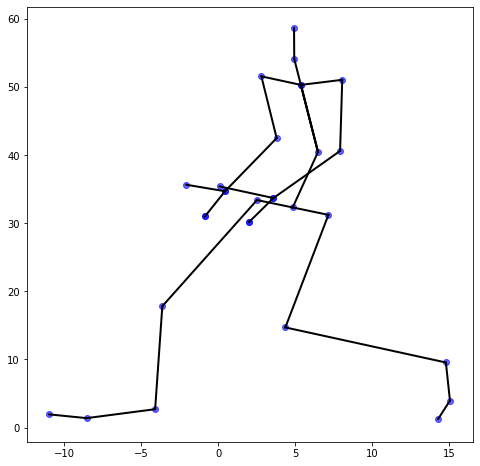

In [9]:
draw_stickfigure(xx[0], 600, xx[0].values)

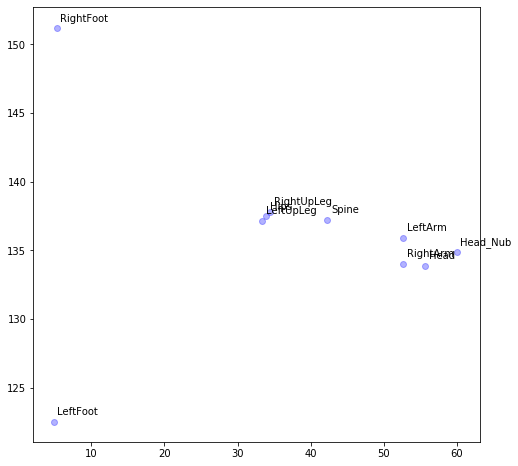

In [10]:
frame = 100
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
for joint in ['LeftArm', 'RightArm', 'Head', 'LeftFoot','RightFoot','Hips','Spine', 'Head_Nub','RightUpLeg', 'LeftUpLeg']:
    ax.scatter(x=df['%s_Yposition'%joint][frame], 
               y=-df['%s_Zposition'%joint][frame], 
              # zs=df['%s_Yposition'%joint][frame], 
               alpha=0.3, c='b', marker='o')
    ax.annotate(joint, 
                (df['%s_Yposition'%joint][frame] + 0.5, 
                 -df['%s_Zposition'%joint][frame] + 0.5))

In [11]:
xx[0].values.head(10)

,Hips_Xposition,Hips_Yposition,Hips_Zposition,RightUpLeg_Xposition,RightUpLeg_Yposition,RightUpLeg_Zposition,RightLeg_Xposition,RightLeg_Yposition,RightLeg_Zposition,RightFoot_Xposition,...,LeftHandThumb1_Zposition,LeftHandThumb1_Nub_Xposition,LeftHandThumb1_Nub_Yposition,LeftHandThumb1_Nub_Zposition,Head_Xposition,Head_Yposition,Head_Zposition,Head_Nub_Xposition,Head_Nub_Yposition,Head_Nub_Zposition
0 days 00:00:00,-6.5115,35.5548,-163.016,-10.433148,35.714772,-163.937351,-14.801316,20.488562,-158.378717,-15.178915,...,-157.207700,1.401805,35.764036,-154.607933,-6.659909,57.734552,-161.099545,-6.560270,62.260643,-161.152703
0 days 00:00:00.008333,-6.5972,35.5371,-162.919,-10.513102,35.709334,-163.862315,-15.042358,20.524319,-158.319937,-15.672458,...,-156.974711,0.408738,35.716127,-154.536823,-6.770138,57.709447,-160.945375,-6.671046,62.235607,-160.993483
0 days 00:00:00.016666,-6.6858,35.5176,-162.814,-10.594002,35.695557,-163.787696,-15.287023,20.555056,-158.259803,-16.168376,...,-156.738655,-0.573855,35.716764,-154.475072,-6.878110,57.683231,-160.790251,-6.784177,62.209561,-160.832300
0 days 00:00:00.024999,-6.7729,35.4935,-162.713,-10.675275,35.678143,-163.708578,-15.531374,20.577471,-158.212687,-16.684456,...,-156.490308,-1.555614,35.749531,-154.419385,-6.991920,57.650404,-160.623218,-6.903220,62.176856,-160.663427
0 days 00:00:00.033332,-6.8609,35.4638,-162.611,-10.757231,35.651549,-163.629406,-15.776503,20.593162,-158.164183,-17.198355,...,-156.247009,-2.516547,35.809890,-154.360109,-7.123233,57.612832,-160.466881,-7.033370,62.139322,-160.499610
0 days 00:00:00.041665,-6.9537,35.4329,-162.502,-10.842677,35.623176,-163.547681,-16.020854,20.604468,-158.121661,-17.711254,...,-156.005697,-3.430544,35.919691,-154.300629,-7.245901,57.574078,-160.305215,-7.162977,62.100743,-160.331335
0 days 00:00:00.049998,-7.0542,35.3954,-162.388,-10.937116,35.590247,-163.455143,-16.264356,20.607512,-158.074161,-18.231330,...,-155.755971,-4.320029,36.065712,-154.237564,-7.379999,57.528264,-160.138546,-7.299381,62.054992,-160.160663
0 days 00:00:00.058331,-7.1548,35.3579,-162.270,-11.031115,35.554215,-163.360615,-16.507945,20.607984,-158.028511,-18.742826,...,-155.505372,-5.179561,36.243528,-154.170917,-7.519282,57.482037,-159.967016,-7.441955,62.008842,-159.984719
0 days 00:00:00.066664,-7.2584,35.3155,-162.141,-11.128451,35.509853,-163.253982,-16.752888,20.597521,-157.980950,-19.263483,...,-155.261455,-6.002656,36.460381,-154.108183,-7.662506,57.432006,-159.796948,-7.588729,61.958883,-159.811126
0 days 00:00:00.074997,-7.3754,35.2710,-161.984,-11.237409,35.464830,-163.124665,-16.998222,20.575763,-157.933759,-19.780648,...,-155.023663,-6.795399,36.708168,-154.057861,-7.816221,57.380039,-159.624108,-7.743666,61.906943,-159.635542


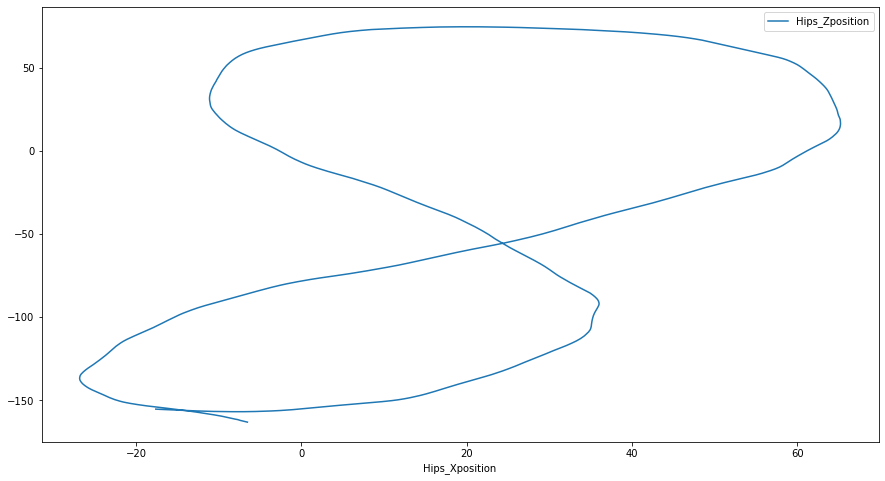

In [12]:
xx[0].values.plot(x='Hips_Xposition', y='Hips_Zposition',figsize=(15,8))

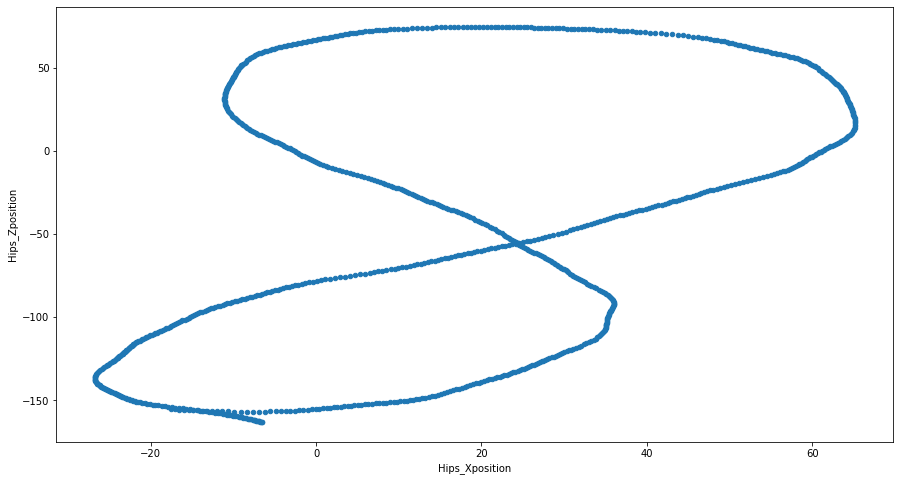

In [13]:
xx[0].values.plot.scatter(x='Hips_Xposition', y='Hips_Zposition', figsize=(15,8))

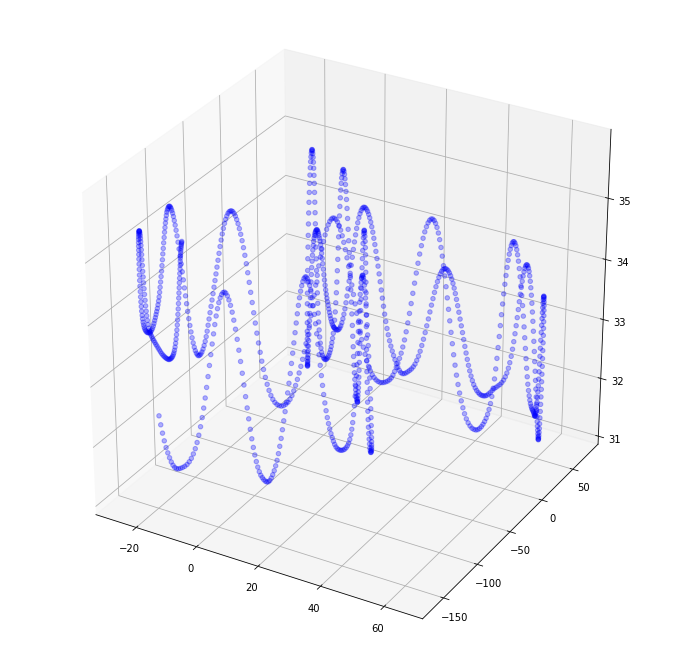

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df.Hips_Xposition, ys=df.Hips_Zposition,  zs=df.Hips_Yposition, alpha=0.3, c='b', marker='o')

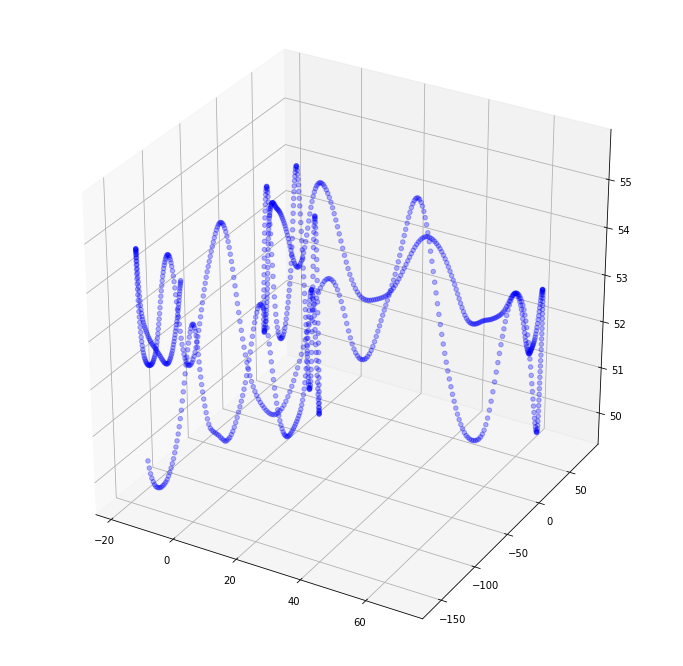

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df.LeftArm_Xposition, ys=df.LeftArm_Zposition,  zs=df.LeftArm_Yposition, alpha=0.3, c='b', marker='o')